# Visualization

## Average Perfomance of Different Models

In [1]:
import matplotlib.pyplot as plt
import numpy as np

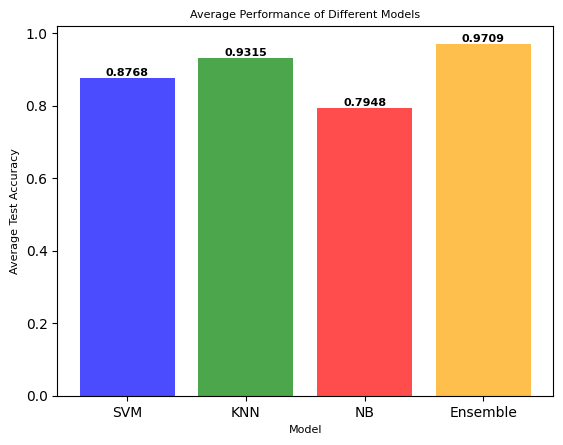

<Figure size 800x500 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Average accuracies for each model
svm_avg_accuracy = 0.8768
knn_avg_accuracy = 0.9315 
nb_avg_accuracy = 0.7948 
ensemble_avg_accuracy = 0.9709 

# Labels and data for the bar graph
labels = ['SVM', 'KNN', 'NB', 'Ensemble']
avg_accuracies = [svm_avg_accuracy, knn_avg_accuracy, nb_avg_accuracy, ensemble_avg_accuracy]
colors = ['blue', 'green', 'red', 'orange']

# Create the bar graph
fig, ax = plt.subplots()

# Plot the bars with different colors
bars = ax.bar(labels, avg_accuracies, color=colors, alpha=0.7)

# Add labels and title
ax.set_xlabel('Model', fontsize=8)
ax.set_ylabel('Average Test Accuracy', fontsize=8)
ax.set_title('Average Performance of Different Models', fontsize=8)

# Add a legend outside the plot
#ax.legend(bars, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Display values on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom',fontsize=8,fontweight='bold')


# Show the plot
plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.show()


## Average Performance Accross All Combinations

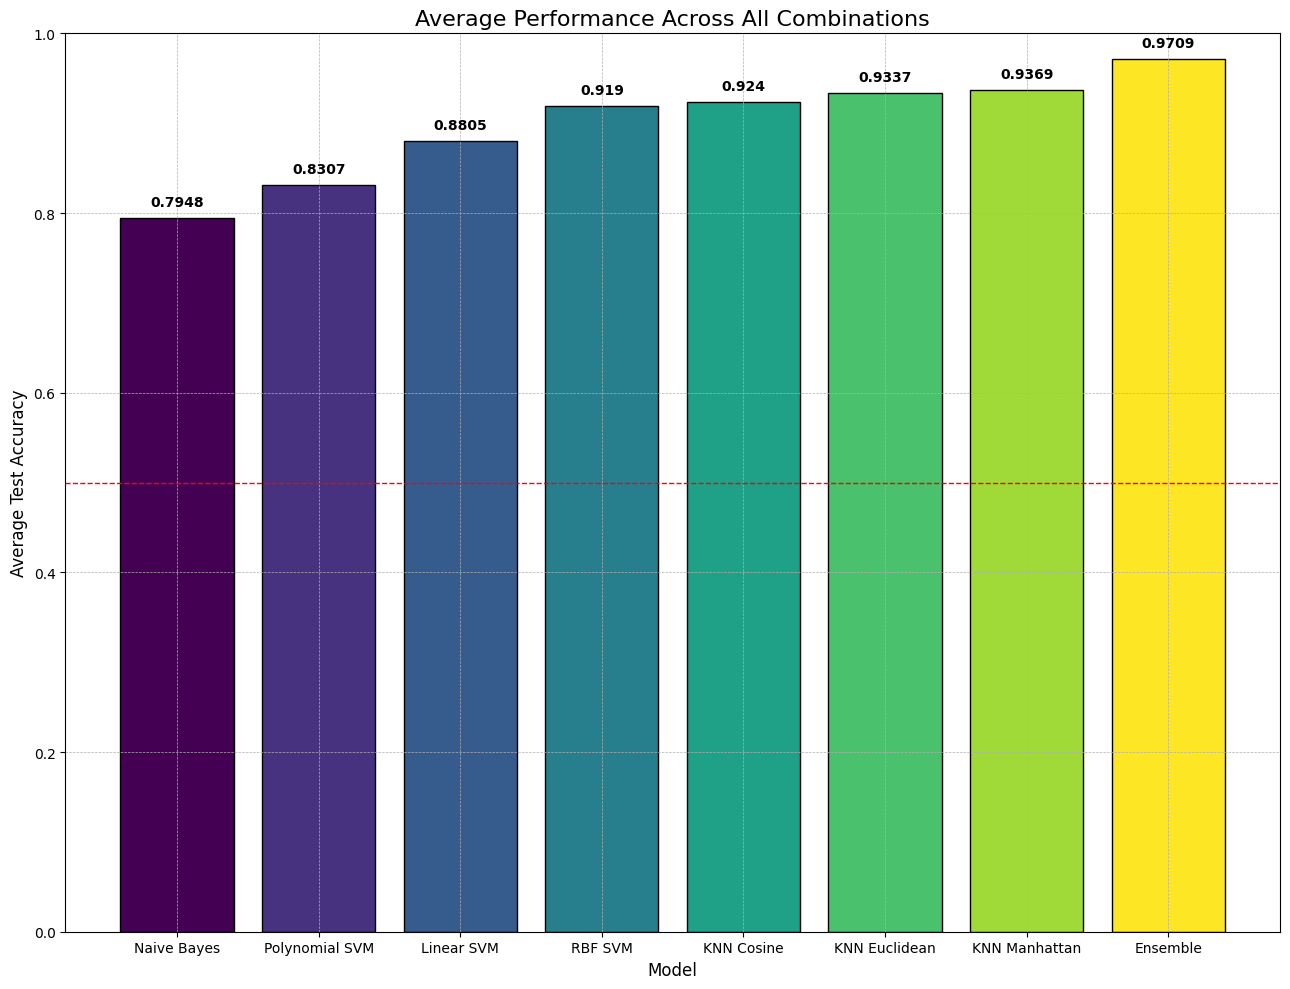

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided tables
models = ['Linear SVM', 'Polynomial SVM', 'RBF SVM', 'KNN Euclidean', 'KNN Manhattan', 'KNN Cosine', 'Naive Bayes', 'Ensemble']

# Accuracy values for each combination (70/30 and 60/40 splits, with and without feature selection, default and tuned)
accuracy_values = {
   'Linear SVM': [0.874, 0.8733, 0.8775, 0.8764, 0.8886, 0.8864, 0.8864, 0.8814],
    'Polynomial SVM': [0.7988, 0.7986, 0.8014, 0.8, 0.8529, 0.8629, 0.8652, 0.8661],
    'RBF SVM': [0.8881, 0.8881, 0.9005, 0.9007, 0.926, 0.9467, 0.9427, 0.9596],
    'KNN Euclidean': [0.9348, 0.9355, 0.935, 0.9357, 0.933, 0.933, 0.9313, 0.9313],
    'KNN Manhattan': [0.9417, 0.9321, 0.9412, 0.9333, 0.9402, 0.9339, 0.9389, 0.9339],
    'KNN Cosine': [0.9207, 0.9212, 0.9257, 0.9261, 0.9221, 0.9221, 0.9268, 0.927],
    'Naive Bayes': [0.7886, 0.8019, 0.7836, 0.8018, 0.795, 0.8019, 0.7837, 0.8018],
    'Ensemble': [0.9574, 0.9829, 0.9623, 0.9811, ]
}

# Calculate average accuracy for each model
average_accuracies = {model: np.mean(acc) for model, acc in accuracy_values.items()}

# Sort the average accuracies
sorted_accuracies = dict(sorted(average_accuracies.items(), key=lambda item: item[1]))

# Plotting
fig, ax = plt.subplots(figsize=(13, 10))

colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_accuracies)))

bars = ax.bar(sorted_accuracies.keys(), sorted_accuracies.values(), color=colors, edgecolor='black')

# Add text labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Average Test Accuracy', fontsize=12)
ax.set_title('Average Performance Across All Combinations', fontsize=16)
ax.set_ylim([0, 1])
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.axhline(y=0.5, color='r', linestyle='--', linewidth=1)

plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()



## Impact of Different Kernels in SVM

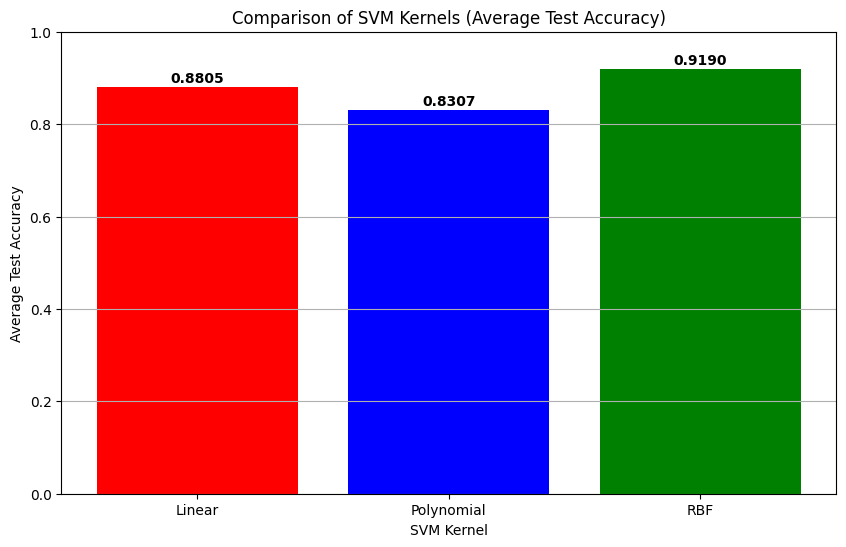

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the provided tables
data = {
    'Kernel': ['Linear', 'Polynomial', 'RBF'],
    'Default_70_30': [0.874, 0.7988, 0.8881],
    'Tuned_70_30': [0.8886, 0.8529, 0.926],
    'Default_60_40': [0.8775, 0.8014, 0.9005],
    'Tuned_60_40': [0.8864, 0.8652, 0.9427],
    'Default_70_30_FS': [0.8733, 0.7986, 0.8881],
    'Tuned_70_30_FS': [0.8864, 0.8629, 0.9467],
    'Default_60_40_FS': [0.8764, 0.8000, 0.9007],
    'Tuned_60_40_FS': [0.8814, 0.8661, 0.9596]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Calculate average accuracies including feature selection columns
df['Average'] = df[['Default_70_30', 'Tuned_70_30', 'Default_60_40', 'Tuned_60_40',
                    'Default_70_30_FS', 'Tuned_70_30_FS', 'Default_60_40_FS', 'Tuned_60_40_FS']].mean(axis=1)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Kernel'], df['Average'], color=['red', 'blue', 'green'])
plt.xlabel('SVM Kernel')
plt.ylabel('Average Test Accuracy')
plt.title('Comparison of SVM Kernels (Average Test Accuracy)')
plt.ylim(0, 1)
plt.grid(axis='y')

# Adding the data labels on top of the bars
for index, value in enumerate(df['Average']):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontweight='bold')

plt.show()


## Impact of Different Metrics in KNN

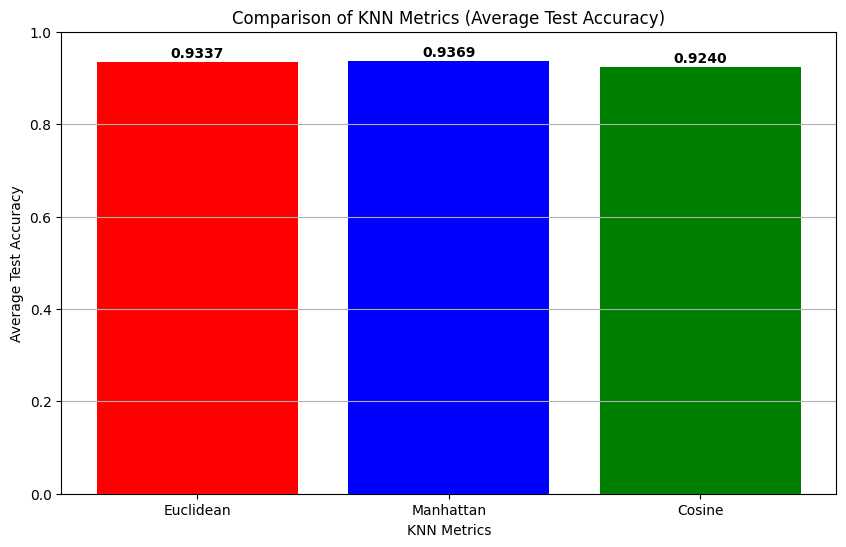

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the provided tables
data = {
    'Kernel': ['Euclidean', 'Manhattan', 'Cosine'],
    'Default_70_30': [0.9348, 0.9417, 0.9207],
    'Tuned_70_30': [0.9355, 0.9412, 0.9221],
    'Default_60_40': [0.9330, 0.9402, 0.9257],
    'Tuned_60_40': [0.9313, 0.9389, 0.9268],
    'Default_70_30_FS': [0.9350, 0.9321, 0.9212],
    'Tuned_70_30_FS': [0.9357, 0.9333, 0.9221],
    'Default_60_40_FS': [0.9330, 0.9339, 0.9261],
    'Tuned_60_40_FS': [0.9313, 0.9339, 0.9270]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Calculate average accuracies including feature selection columns
df['Average'] = df[['Default_70_30', 'Tuned_70_30', 'Default_60_40', 'Tuned_60_40',
                    'Default_70_30_FS', 'Tuned_70_30_FS', 'Default_60_40_FS', 'Tuned_60_40_FS']].mean(axis=1)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Kernel'], df['Average'], color=['red', 'blue', 'green'])
plt.xlabel('KNN Metrics')
plt.ylabel('Average Test Accuracy')
plt.title('Comparison of KNN Metrics (Average Test Accuracy)')
plt.ylim(0, 1)
plt.grid(axis='y')

# Adding the data labels on top of the bars
for index, value in enumerate(df['Average']):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontweight='bold')

plt.show()


## Impact of Feature Selection on Model Performance

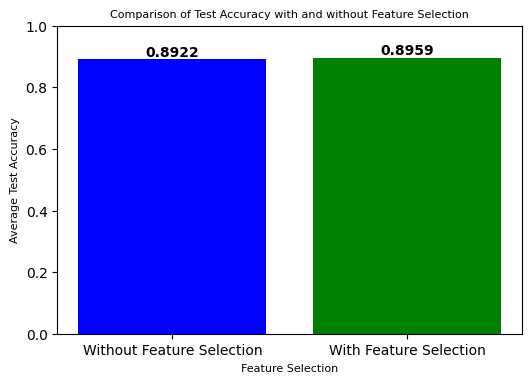

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Test accuracy data for 70/30 ratio
accuracy_70_30 = {
    "without_fs": [0.874, 0.8886, 0.7988, 0.8529, 0.8881, 0.926, 0.9348, 0.9355, 0.9417, 0.9412, 0.9207, 0.9221, 0.7886, 0.795, 0.9574],
    "with_fs": [0.8733, 0.8864, 0.7986, 0.8629, 0.8881, 0.9467, 0.935, 0.9357, 0.9321, 0.9333, 0.9212, 0.9221, 0.8019, 0.8019, 0.9829]
}

# Test accuracy data for 60/40 ratio
accuracy_60_40 = {
    "without_fs": [0.8775, 0.8864, 0.8014, 0.8652, 0.9005, 0.9427, 0.933, 0.9313, 0.9402, 0.9389, 0.9257, 0.9268, 0.7836, 0.7837, 0.9623],
    "with_fs": [0.8764, 0.8814, 0.8, 0.8661, 0.9007, 0.9596, 0.933, 0.9313, 0.9339, 0.9339, 0.9261, 0.927, 0.8018, 0.8018, 0.9811]
}

# Averaging the results for both ratios
average_without_fs = np.mean(accuracy_70_30["without_fs"] + accuracy_60_40["without_fs"])
average_with_fs = np.mean(accuracy_70_30["with_fs"] + accuracy_60_40["with_fs"])

# Data for visualization
categories = ['Without Feature Selection', 'With Feature Selection']
averages = [average_without_fs, average_with_fs]

# Plotting the data
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, averages, color=['blue', 'green'],width=0.8)

# Adding the data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Feature Selection', fontsize=8)
plt.ylabel('Average Test Accuracy',fontsize=8)
plt.title('Comparison of Test Accuracy with and without Feature Selection', fontsize=8)
plt.ylim(0, 1)
plt.show()


## Default vs Tune Models

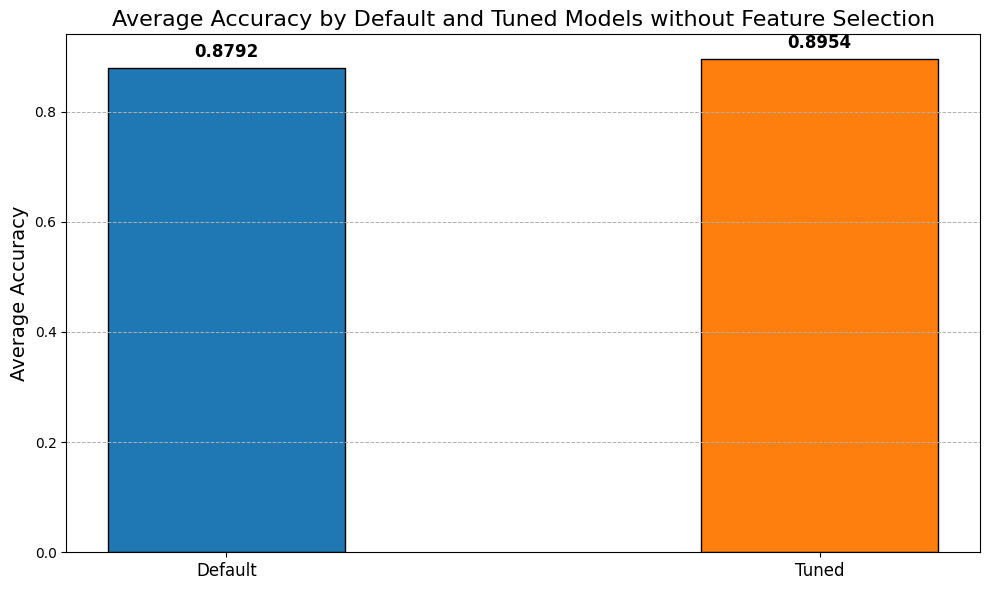

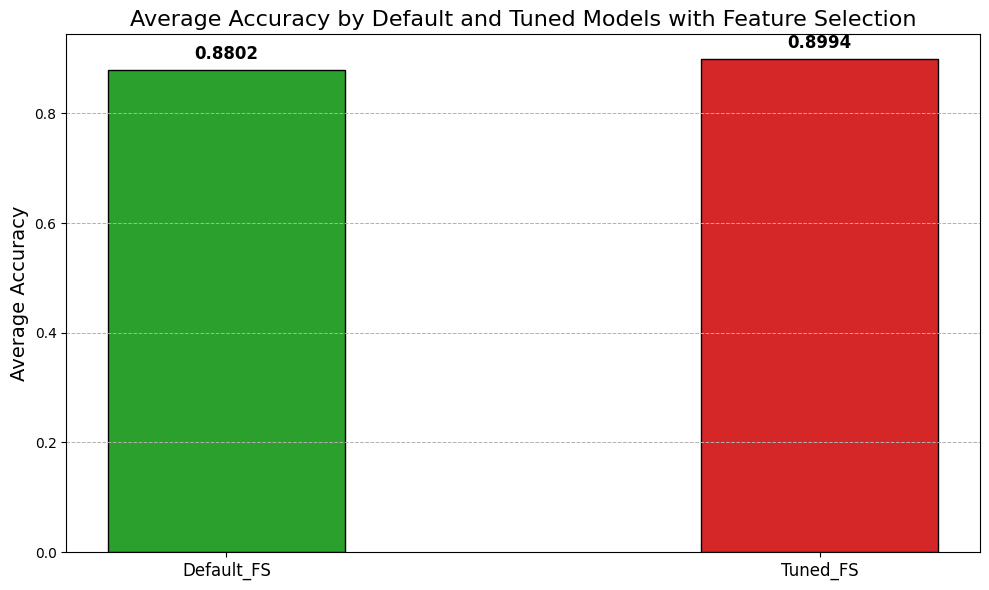

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from the provided tables
data = {
    'Model': ['SVM_Linear', 'SVM_Polynomial', 'SVM_RBF', 'KNN_Euclidean', 'KNN_Manhattan', 'KNN_Cosine', 'NB_Gaussian'],
    'Default_70_30': [0.874, 0.7988, 0.8881, 0.9348, 0.9417, 0.9207, 0.7886],
    'Default_60_40': [0.8775, 0.8014, 0.9005, 0.933, 0.9402, 0.9257, 0.7836],
    'Tuned_70_30': [0.8886, 0.8529, 0.926, 0.9355, 0.9412, 0.9221, 0.795],
    'Tuned_60_40': [0.8864, 0.8652, 0.9427, 0.9313, 0.9389, 0.9268, 0.7837],
    'Default_FS_70_30': [0.8733, 0.7986, 0.8881, 0.935, 0.9321, 0.9212, 0.8019],
    'Default_FS_60_40': [0.8764, 0.8, 0.9007, 0.933, 0.9339, 0.9261, 0.8018],
    'Tuned_FS_70_30': [0.8884, 0.8629, 0.9467, 0.9357, 0.9333, 0.9221, 0.8019],
    'Tuned_FS_60_40': [0.8814, 0.8661, 0.9596, 0.9313, 0.9339, 0.927, 0.8018]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the average accuracy for Default and Tuned models without feature selection
df['Default_Avg'] = df[['Default_70_30', 'Default_60_40']].mean(axis=1)
df['Tuned_Avg'] = df[['Tuned_70_30', 'Tuned_60_40']].mean(axis=1)

# Calculate the average accuracy for Default and Tuned models with feature selection
df['Default_FS_Avg'] = df[['Default_FS_70_30', 'Default_FS_60_40']].mean(axis=1)
df['Tuned_FS_Avg'] = df[['Tuned_FS_70_30', 'Tuned_FS_60_40']].mean(axis=1)

# Calculate overall average for all models
default_avg = df['Default_Avg'].mean()
tuned_avg = df['Tuned_Avg'].mean()
default_fs_avg = df['Default_FS_Avg'].mean()
tuned_fs_avg = df['Tuned_FS_Avg'].mean()

# Plotting for models without feature selection
labels_without_fs = ['Default', 'Tuned']
averages_without_fs = [default_avg, tuned_avg]
colors_without_fs = ['#1f77b4', '#ff7f0e']

x_without_fs = np.arange(len(labels_without_fs))
width = 0.4

fig1, ax1 = plt.subplots(figsize=(10, 6))
rects1 = ax1.bar(x_without_fs, averages_without_fs, width, label='Accuracy', color=colors_without_fs, edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Average Accuracy', fontsize=14)
ax1.set_title('Average Accuracy by Default and Tuned Models without Feature Selection', fontsize=16)
ax1.set_xticks(x_without_fs)
ax1.set_xticklabels(labels_without_fs, fontsize=12)
ax1.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Adding data labels
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

autolabel(rects1, ax1)

fig1.tight_layout()

# Plotting for models with feature selection
labels_with_fs = ['Default_FS', 'Tuned_FS']
averages_with_fs = [default_fs_avg, tuned_fs_avg]
colors_with_fs = ['#2ca02c', '#d62728']

x_with_fs = np.arange(len(labels_with_fs))
width = 0.4

fig2, ax2 = plt.subplots(figsize=(10, 6))
rects2 = ax2.bar(x_with_fs, averages_with_fs, width, label='Accuracy', color=colors_with_fs, edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Average Accuracy', fontsize=14)
ax2.set_title('Average Accuracy by Default and Tuned Models with Feature Selection', fontsize=16)
ax2.set_xticks(x_with_fs)
ax2.set_xticklabels(labels_with_fs, fontsize=12)
ax2.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Adding data labels
autolabel(rects2, ax2)

fig2.tight_layout()

plt.show()


## Performance Across Different Splitting Ratios

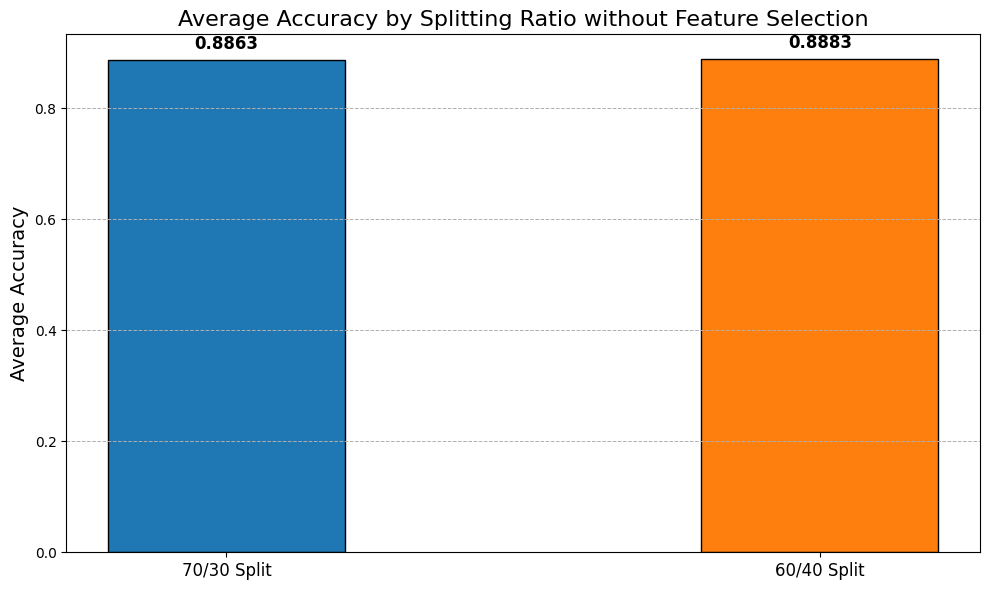

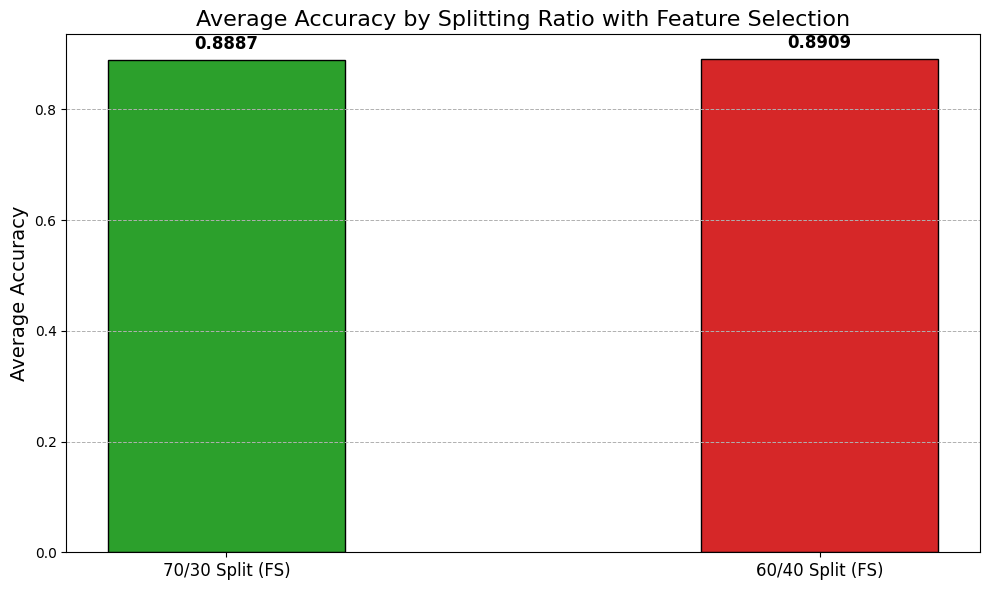

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data for different splitting ratios
data_split = {
    'Model': ['SVM_Linear', 'SVM_Polynomial', 'SVM_RBF', 'KNN_Euclidean', 'KNN_Manhattan', 'KNN_Cosine', 'NB_Gaussian'],
    'Default_70_30': [0.874, 0.7988, 0.8881, 0.9348, 0.9417, 0.9207, 0.7886],
    'Default_60_40': [0.8775, 0.8014, 0.9005, 0.933, 0.9402, 0.9257, 0.7836],
    'Tuned_70_30': [0.8886, 0.8529, 0.926, 0.9355, 0.9412, 0.9221, 0.795],
    'Tuned_60_40': [0.8864, 0.8652, 0.9427, 0.9313, 0.9389, 0.9268, 0.7837],
    'Default_FS_70_30': [0.8733, 0.7986, 0.8881, 0.935, 0.9321, 0.9212, 0.8019],
    'Default_FS_60_40': [0.8764, 0.8, 0.9007, 0.933, 0.9339, 0.9261, 0.8018],
    'Tuned_FS_70_30': [0.8884, 0.8629, 0.9467, 0.9357, 0.9333, 0.9221, 0.8019],
    'Tuned_FS_60_40': [0.8814, 0.8661, 0.9596, 0.9313, 0.9339, 0.927, 0.8018]
}

# Create DataFrame
df_split = pd.DataFrame(data_split)

# Calculate the average accuracy for each splitting ratio without feature selection
df_split['Avg_70_30'] = df_split[['Default_70_30', 'Tuned_70_30']].mean(axis=1)
df_split['Avg_60_40'] = df_split[['Default_60_40', 'Tuned_60_40']].mean(axis=1)

# Calculate the average accuracy for each splitting ratio with feature selection
df_split['Avg_FS_70_30'] = df_split[['Default_FS_70_30', 'Tuned_FS_70_30']].mean(axis=1)
df_split['Avg_FS_60_40'] = df_split[['Default_FS_60_40', 'Tuned_FS_60_40']].mean(axis=1)

# Calculate overall average for both splitting ratios without feature selection
avg_70_30 = df_split['Avg_70_30'].mean()
avg_60_40 = df_split['Avg_60_40'].mean()

# Calculate overall average for both splitting ratios with feature selection
avg_fs_70_30 = df_split['Avg_FS_70_30'].mean()
avg_fs_60_40 = df_split['Avg_FS_60_40'].mean()

# Plotting for models without feature selection
labels_without_fs = ['70/30 Split', '60/40 Split']
averages_without_fs = [avg_70_30, avg_60_40]
colors_without_fs = ['#1f77b4', '#ff7f0e']

x_without_fs = np.arange(len(labels_without_fs))
width = 0.4

fig1, ax1 = plt.subplots(figsize=(10, 6))
rects1 = ax1.bar(x_without_fs, averages_without_fs, width, label='Accuracy', color=colors_without_fs, edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Average Accuracy', fontsize=14)
ax1.set_title('Average Accuracy by Splitting Ratio without Feature Selection', fontsize=16)
ax1.set_xticks(x_without_fs)
ax1.set_xticklabels(labels_without_fs, fontsize=12)
ax1.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Adding data labels
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

autolabel(rects1, ax1)

fig1.tight_layout()

# Plotting for models with feature selection
labels_with_fs = ['70/30 Split (FS)', '60/40 Split (FS)']
averages_with_fs = [avg_fs_70_30, avg_fs_60_40]
colors_with_fs = ['#2ca02c', '#d62728']

x_with_fs = np.arange(len(labels_with_fs))
width = 0.4

fig2, ax2 = plt.subplots(figsize=(10, 6))
rects2 = ax2.bar(x_with_fs, averages_with_fs, width, label='Accuracy', color=colors_with_fs, edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Average Accuracy', fontsize=14)
ax2.set_title('Average Accuracy by Splitting Ratio with Feature Selection', fontsize=16)
ax2.set_xticks(x_with_fs)
ax2.set_xticklabels(labels_with_fs, fontsize=12)
ax2.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Adding data labels
autolabel(rects2, ax2)

fig2.tight_layout()

plt.show()
